<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/ML_Projects_Codes/StudentMarksClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Performance Clustering using clustering model**

#**Dependencies**

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from sklearn.cluster import KMeans

#**Data Collection & Pre-processing**

In [12]:
# student data
student = pd.read_csv('/content/drive/MyDrive/Colab_python/student marks list.csv')

# check
student.head()

,SNo,Name,Tamil,English,Maths,Science,Social
0,1,arun,81,61,98,82,91
1,2,akila,96,79,61,95,82
2,3,banu,86,99,87,83,76
3,4,bhuvana,78,86,81,70,95
4,5,cathrina,63,71,93,85,84


In [13]:
# check information
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SNo      50 non-null     int64 
 1   Name     50 non-null     object
 2   Tamil    50 non-null     int64 
 3   English  50 non-null     int64 
 4   Maths    50 non-null     int64 
 5   Science  50 non-null     int64 
 6   Social   50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [14]:
# check null
student.isnull().sum()

,0
SNo,0
Name,0
Tamil,0
English,0
Maths,0
Science,0
Social,0


* seems no null values

In [15]:
# basic stats
student.describe()

,SNo,Tamil,English,Maths,Science,Social
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,82.86000,78.060000,82.220000,79.800000,80.680000
std,14.57738,11.83735,10.587652,10.725309,10.337173,10.998033
min,1.00000,60.00000,61.000000,61.000000,63.000000,60.000000
25%,13.25000,73.00000,70.000000,72.500000,70.250000,73.250000
50%,25.50000,86.00000,78.000000,84.000000,79.000000,82.000000
75%,37.75000,89.00000,85.750000,91.000000,88.500000,88.000000
max,50.00000,100.00000,99.000000,98.000000,99.000000,100.000000


#**Data Visualization**

<Axes: xlabel='Tamil', ylabel='Count'>

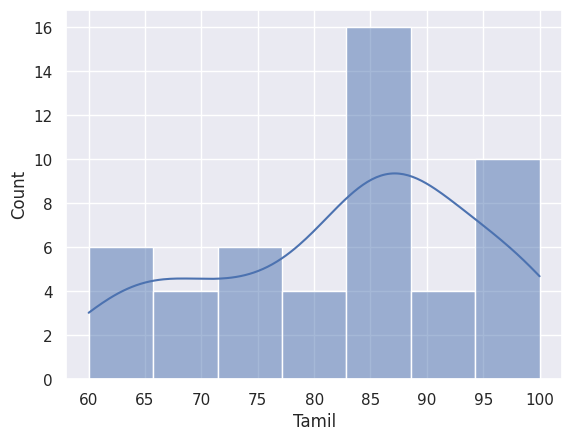

In [18]:
# distribution of tamil marks
sns.set()

sns.histplot(x='Tamil',data=student,kde=True)

<Axes: xlabel='English', ylabel='Count'>

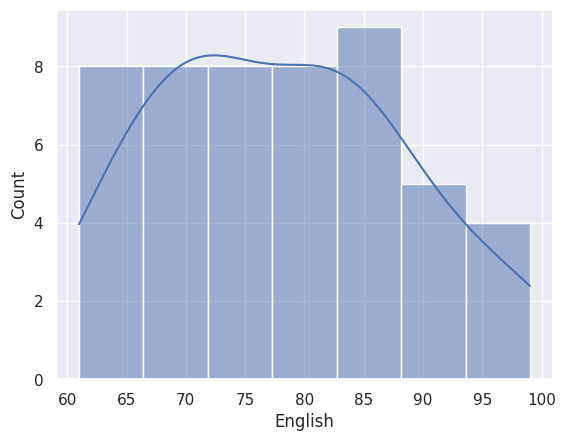

In [19]:
# distribution of english marks

sns.histplot(x='English',data=student,kde=True)

<Axes: xlabel='Maths', ylabel='Count'>

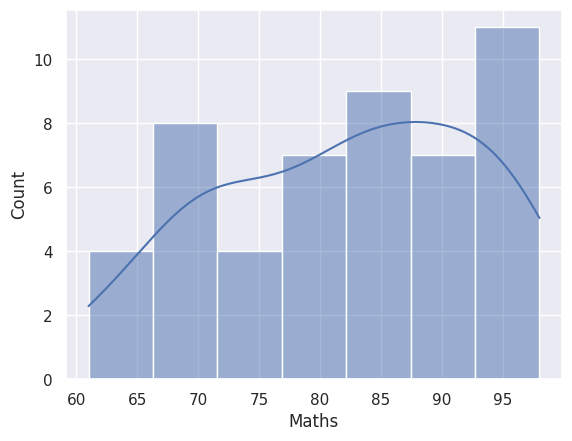

In [20]:
# distribution of maths marks

sns.histplot(x='Maths',data=student,kde=True)

<Axes: xlabel='Science', ylabel='Count'>

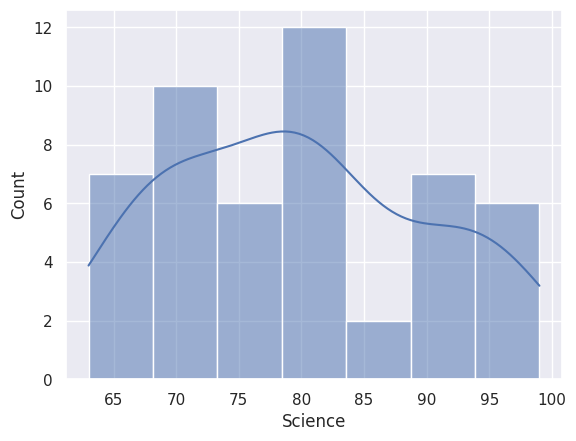

In [21]:

# distribution of science marks

sns.histplot(x='Science',data=student,kde=True)

<Axes: xlabel='Social', ylabel='Count'>

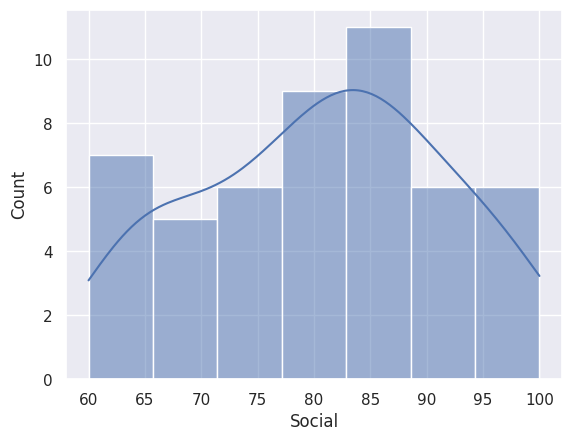

In [22]:

# distribution of social marks

sns.histplot(x='Social',data=student,kde=True)

* all 5 subject marks has distributed in normal
* Which means , no need to fear on overfitting and underfitting

#**Model Building**

**Dropping unwanted datas**

In [30]:
# wanted datas
x = student.iloc[:,[2,3,4,5,6]].values

# check
print(x)

[[ 81  61  98  82  91]
 [ 96  79  61  95  82]
 [ 86  99  87  83  76]
 [ 78  86  81  70  95]
 [ 63  71  93  85  84]
 [ 72  68  74  76  76]
 [ 66  83  89  89  87]
 [ 60  77  81  77 100]
 [100  91  76  82  97]
 [ 72  80  70  92  85]
 [ 67  65  91  99  63]
 [ 76  86  98  99  88]
 [ 72  73  71  64  68]
 [ 77  66  95  78  94]
 [ 83  82  72  71  71]
 [ 62  73  71  70  81]
 [ 82  70  84  79  82]
 [ 89  82  89  93  92]
 [ 94  67  62  70  60]
 [ 86  92  84  93  90]
 [ 87  63  90  81  74]
 [ 89  72  96  87  88]
 [ 77  84  83  65  79]
 [ 98  99  69  70  64]
 [ 64  65  92  67  64]
 [ 97  92  76  69  78]
 [ 88  83  96  91  78]
 [ 95  91  79  70  92]
 [ 88  74  93  96  84]
 [100  86  77  78  99]
 [ 88  80  68  68  70]
 [ 84  69  81  79  78]
 [100  69  66  89  73]
 [ 61  74  84  83  74]
 [ 96  83  86  79  84]
 [ 88  78  70  72  82]
 [ 88  96  85  96  67]
 [ 70  99  62  80  62]
 [ 65  61  87  78  65]
 [ 88  71  70  72  65]
 [ 84  78  88  63  83]
 [ 98  73  95  80  82]
 [ 87  70  96  65  86]
 [ 88  89  

In [32]:
# wcss - within cluster sum of squares

wcss = []

# 10 times of clusters check
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

# check
print(wcss)

[29158.299999999996, 22701.204545454544, 18045.53167420814, 16639.8743315508, 14086.35354645355, 13050.083333333332, 10760.13005050505, 11077.044047619045, 9724.919047619043, 9536.035714285712]


**Finding Optimum cluster value using Elbow Point Graph**

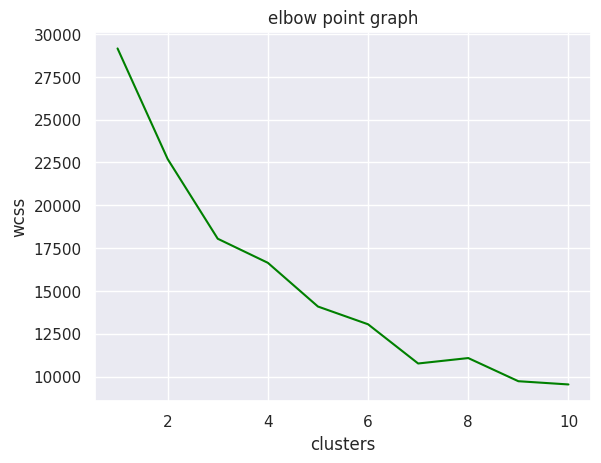

In [34]:
# elbow point graph

plt.plot(range(1,11),wcss,color='green')
plt.title('elbow point graph')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

* may notice that cluster 3 has elbow point where others decreases
* n_clusters = 3

**Finding Labels**

In [56]:
# new instance of KMeans

model = KMeans(n_clusters=3,init='k-means++',random_state=3)

# labels
label = model.fit_predict(x)

print(label)

[2 1 0 0 2 2 2 2 0 2 2 0 1 2 1 2 2 0 1 0 2 0 1 1 2 1 0 0 0 0 1 2 1 2 0 1 0
 1 2 1 1 0 2 0 0 0 2 1 2 0]


* 0 - high performance
* 1 - low performance
* 2 - medium performance

**Cluster Visualization**

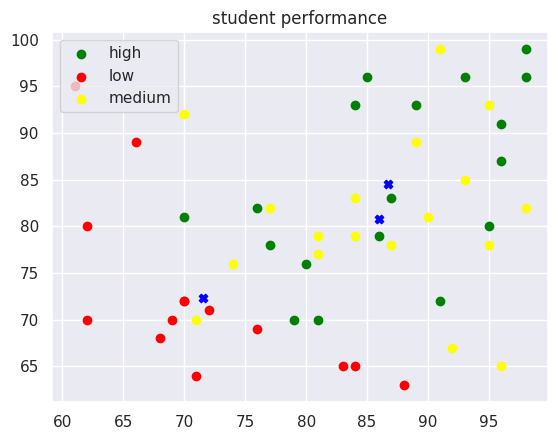

In [60]:
# visualise

# marks based - maths and science
plt.scatter(x[label == 0,2],x[label == 0,3],color='green',marker='o',label='high')
plt.scatter(x[label == 1,2],x[label == 1,3],color='red',marker='o',label='low')
plt.scatter(x[label == 2,2],x[label == 2,3],color='yellow',marker='o',label='medium')
plt.title('student performance')
plt.legend()

# centroids
centers = model.cluster_centers_

# centroid
plt.scatter(centers[:,2],centers[:,3],color='blue',marker='X',label='centers')
plt.show()

**Thank you...**